In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset/DATASET.csv


In [6]:
import os
os.listdir('/kaggle/input')

['spotify-dataset']

# Importing DataFrame -> **Spotify review**

In [7]:
import pandas as pd
df = pd.read_csv('/kaggle/input/spotify-dataset/DATASET.csv')
df = df[:2000]

Converting label into numerical data for positive and negative value by using lambda function

In [8]:
df['feedback'] = df['label'].apply(lambda x:1 if x == 'POSITIVE' else 0)
df.drop(df[['label']] , axis = 'columns')

,Review,feedback
0,"Great music service, the audio is high quality...",1
1,Please ignore previous negative rating. This a...,1
2,"This pop-up ""Get the best Spotify experience o...",0
3,Really buggy and terrible to use as of recently,0
4,Dear Spotify why do I get songs that I didn't ...,0
...,...,...
1995,I loved the app and listening to music for a w...,0
1996,I am happy by listening songs with spotify,1
1997,The apps keeps crashing anytime I try to make ...,0
1998,AVOID THIS APP!!! you are better off listening...,0


Data Cleaning  by droping NA values in DataFrame

In [9]:
df = df.dropna()
df.isna().sum()

Review      0
label       0
feedback    0
dtype: int64

* Preparing X, Y for spliting data into train - test Data
* X -> Input Data
* Y -> Result Data 

In [10]:
X = df.Review
Y = df.feedback

* Splitting data into train and test sample by using Sklearn Train-Test-Split librabry
* Test size : Train size -> 1:3

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X, Y , test_size = 0.25 , random_state = 30)

* Importing CountVectorizer for converting Review Column into numerical data
* Transforming X into numerical data array

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

x_train_count  = v.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# MultinimialNB model accuaracy is **87%**

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count , y_train)
x_test_count = v.transform(x_test.values)
model.score(x_test_count , y_test)

0.878

#  Extra Review Data for Prediction

In [15]:
review = [
    
    "Spotify’s music recommendations are spot on! I discover new songs every day. Love it!",
    "The user interface is smooth, and the curated playlists are a great way to find fresh tunes.",
    "Spotify’s sound quality is top-notch, and I can listen offline which is a big plus.",
    "I love how Spotify connects with my other devices seamlessly. Makes life easier!",
    "The variety of music and podcasts available is unmatched. A must-have for music lovers.",

    "Too many ads! The free version is almost unusable with the frequent interruptions.",
    "It drains my battery way too quickly, especially when streaming for long periods.",
    "Sometimes songs get randomly skipped, which is frustrating during a workout.",
    "The app lags a lot, especially when switching between playlists or searching for songs.",
    "Spotify's premium subscription is too expensive for the features provided."
    
]
review_count = v.transform(review)
model.predict(review_count)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

So ,MultiNomial Naive Bayes model has predicted review with 9/10 accuracy

Now , y_predict for Confusion Matrix

In [16]:
y_predict = model.predict(x_test_count)

# Predicted Test Visualization using **Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)

Importing Libraries for Confusion Matrix Visualization

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Visualization using **Seaborn** Library

Text(50.722222222222214, 0.5, 'actual')

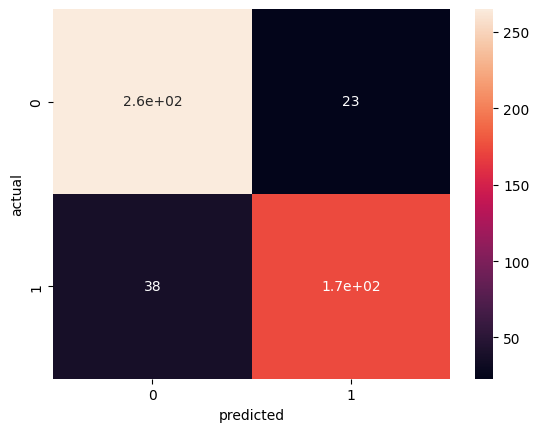

In [19]:
sns.heatmap(cm , annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# **Logistic Regression Model**

In [20]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train_count,y_train)


LogisticRegression()

# Logistic Regression Model Accuracy - **89%**

In [21]:
Lr.score(x_test_count , y_test)

0.874

In [23]:
review_count = v.transform(reviews)
Lr.predict(review_count)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

That how you can easily see that our model has predicted reviews with 1.0 accuracy


# **Support Vecter Machine Model**

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [27]:
svc = SVC()
svc.fit(x_train_count  , y_train)

SVC()

# So , SVM model accuracy is **86%**

In [28]:
svc.score(x_test_count  , y_test)

0.868

#  Hence , I've used 3 model for this dataset with Accuracy:
 * SVM -> 86%
 * Logistic Regression -> 89%
 * MultinomialNB -> 87%